#### Setup

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from qumcmc import *

In [2]:
sns.set()

In [3]:
# plt.figure(figsize=(10,8))
# for indx in range(1,6):
#     plt.plot(DATA5[indx]['classical']['kldiv'] , label= str(indx))
#     # plt.plot(DATA5[indx]['quantum']['kldiv'] , label= 'quantum')
# plt.xlabel("iterations ")
# plt.ylabel("KL divergence")
# plt.yscale('log')
# plt.title('classical')
# plt.legend()
# plt.show()
# plt.figure(figsize=(10,8))
# for indx in range(1,6):
#     # plt.plot(DATA5[indx]['classical']['kldiv'] , label= str(indx))
#     plt.plot(DATA5[indx]['quantum']['kldiv'] , label= str(indx))
# plt.xlabel("iterations ")
# plt.ylabel("KL divergence")
# plt.yscale('log')
# plt.title('quantum')
# plt.legend()
# plt.show()



In [4]:
def convergence_data_plot(DATA, nspins:int,to_check:str= 'kldiv'):
    df_cl = pd.DataFrame(); df_q = pd.DataFrame()
    for i in range(1, DATA.shape[1]+1):
        df_cl[i] = DATA[i]['classical'][to_check]
        df_q[i] = DATA[i]['quantum'][to_check]

    plt.figure(figsize=(10,8))
    plt.plot(df_cl.mean(axis=1), label = 'classical')
    plt.fill_between(range(df_cl.shape[0]),y1=df_cl.mean(axis=1)-0.5*df_cl.std(axis=1),y2=df_cl.mean(axis=1)+0.5*df_cl.std(axis=1), alpha = 0.3)
    plt.plot(df_q.mean(axis=1), label= 'quantum')
    plt.fill_between(range(df_q.shape[0]),y1=df_q.mean(axis=1)-0.5*df_q.std(axis=1),y2=df_q.mean(axis=1)+0.5*df_q.std(axis=1), alpha = 0.4)
    plt.xlabel("Iterations ")
    plt.ylabel("KL divergence")
    plt.yscale('log')
    plt.title('Convergence Data: KL div |'+ ' npsins : '+ str(nspins))
    plt.legend()
    plt.show()


In [10]:
def accetance_prob_hist(DATA, nspins: int):
    
    classical_acp = []; quantum_acp = []
    for i in range(1, DATA.shape[1]+1):
        classical_acp.append(DATA[i]['classical']['acceptance_prob'])
        quantum_acp.append(DATA[i]['quantum']['acceptance_prob'])

    plt.figure(figsize=(10,10))

    plt.hist(np.log10(quantum_acp),label= 'quantum enhanced' , alpha= 0.8, bins= 20)
    plt.hist(np.log10(classical_acp),label= 'classical uniform' ,alpha= 0.5, bins= 20)


    # plt.xscale("log")

    plt.xlabel("Acceptance Probabilities | scale: log10")
    # plt.ylabel("Hamming Distance")
    plt.legend()
    plt.show()

### **5 qubit**

In [5]:
DATA5 = pd.read_json('SamplingData/DATA_5qubit.json')

#### KL Div

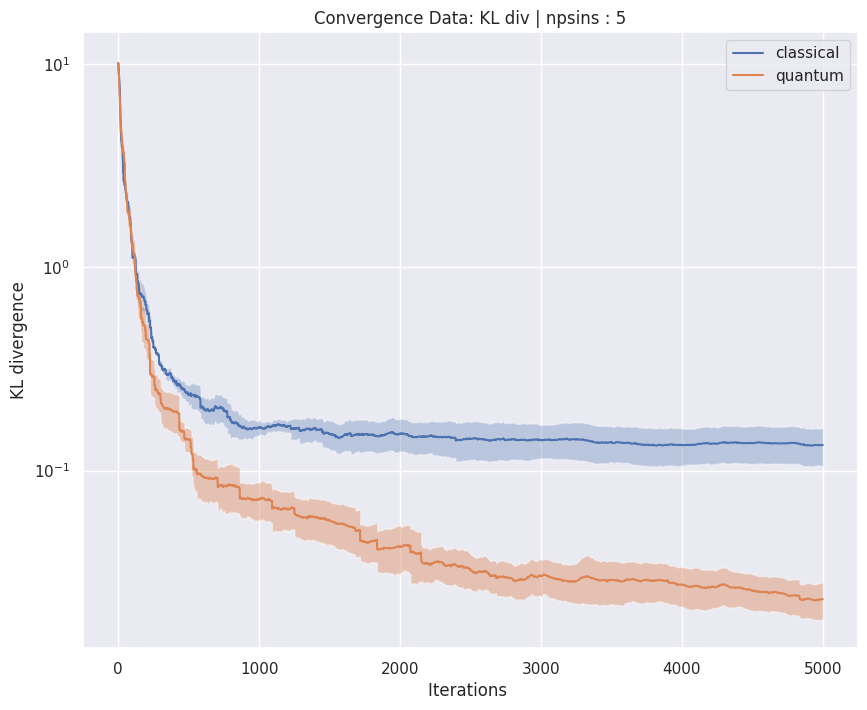

In [6]:
convergence_data_plot(DATA5, to_check='kldiv', nspins= 5)

#### Acceptance Prob

In [1]:
accetance_prob_hist(DATA5, nspins=5)

### **10 Qubits**

In [46]:
DATA10 = pd.read_json('SamplingData/DATA_10qubit.json')

#### KL Div

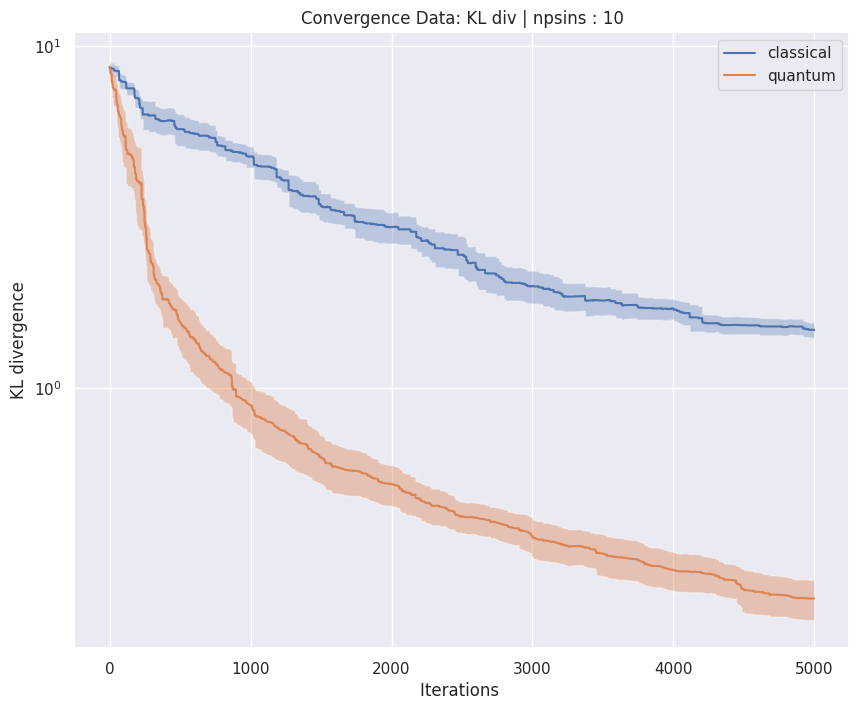

In [52]:
convergence_data_plot(DATA10, to_check= 'kldiv', nspins=10)

### **15 Qubits**